In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns


In [119]:
os.getcwd()

'N:\\Machine Learning Assignments\\Car Price Prediction'

In [120]:
os.listdir()

['.ipynb_checkpoints',
 'car data.csv',
 'CAR DETAILS FROM CAR DEKHO.csv',
 'CarPricePrediction',
 'Car_Price_Prediction-Copy1.ipynb',
 'Car_Price_Prediction.ipynb',
 'random_forest_regression_model.pkl']

In [121]:
# Extracting Dataset
df=pd.read_csv("N:\\Machine Learning Assignments\\Car Price Prediction\\car data.csv")

In [122]:
df.head(4)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0


In [123]:
df.shape

(301, 9)

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [125]:
#Checking Datatypes
df.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
dtype: object

In [126]:
# No null values
df.isnull().sum()/len(df)*100

Car_Name         0.0
Year             0.0
Selling_Price    0.0
Present_Price    0.0
Kms_Driven       0.0
Fuel_Type        0.0
Seller_Type      0.0
Transmission     0.0
Owner            0.0
dtype: float64

In [127]:
# Checking dataset summary for numerical values
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [128]:
# Checking dataset summary for categorical values
df.describe(include= "object")

,Car_Name,Fuel_Type,Seller_Type,Transmission
count,301,301,301,301
unique,98,3,2,2
top,city,Petrol,Dealer,Manual
freq,26,239,195,261


In [129]:
# CHecking unique values in categorical values
print(df["Seller_Type"].unique())
print(df["Transmission"].unique())
print(df["Fuel_Type"].unique())
print(df["Owner"].unique())

['Dealer' 'Individual']
['Manual' 'Automatic']
['Petrol' 'Diesel' 'CNG']
[0 1 3]


In [130]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [131]:
final_df=df[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]

In [132]:
final_df["Current_Year"]=2022

In [133]:
final_df.head(2)

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2022
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2022


In [134]:
final_df["No_year"]= final_df["Current_Year"]-final_df["Year"]

In [135]:
final_df.head(2)

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year,No_year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2022,8
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2022,9


In [136]:
final_df.drop(["Year"], axis=1, inplace=True)


In [137]:
final_df.drop(["Current_Year"], axis=1, inplace=True)

In [138]:
final_df.head(3)

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,No_year
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,8
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,9
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,5


# Encoding

In [139]:
final_df=pd.get_dummies(final_df,drop_first=True)

In [140]:
final_df.head(2)

,Selling_Price,Present_Price,Kms_Driven,Owner,No_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,8,0,1,0,1
1,4.75,9.54,43000,0,9,1,0,0,1


In [141]:
#final_df.drop(["Year"], axis=1, inplace=True)

KeyError: "['Year'] not found in axis"

In [142]:
final_df.head(2)

,Selling_Price,Present_Price,Kms_Driven,Owner,No_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,8,0,1,0,1
1,4.75,9.54,43000,0,9,1,0,0,1


In [143]:
final_df.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,No_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
No_year,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


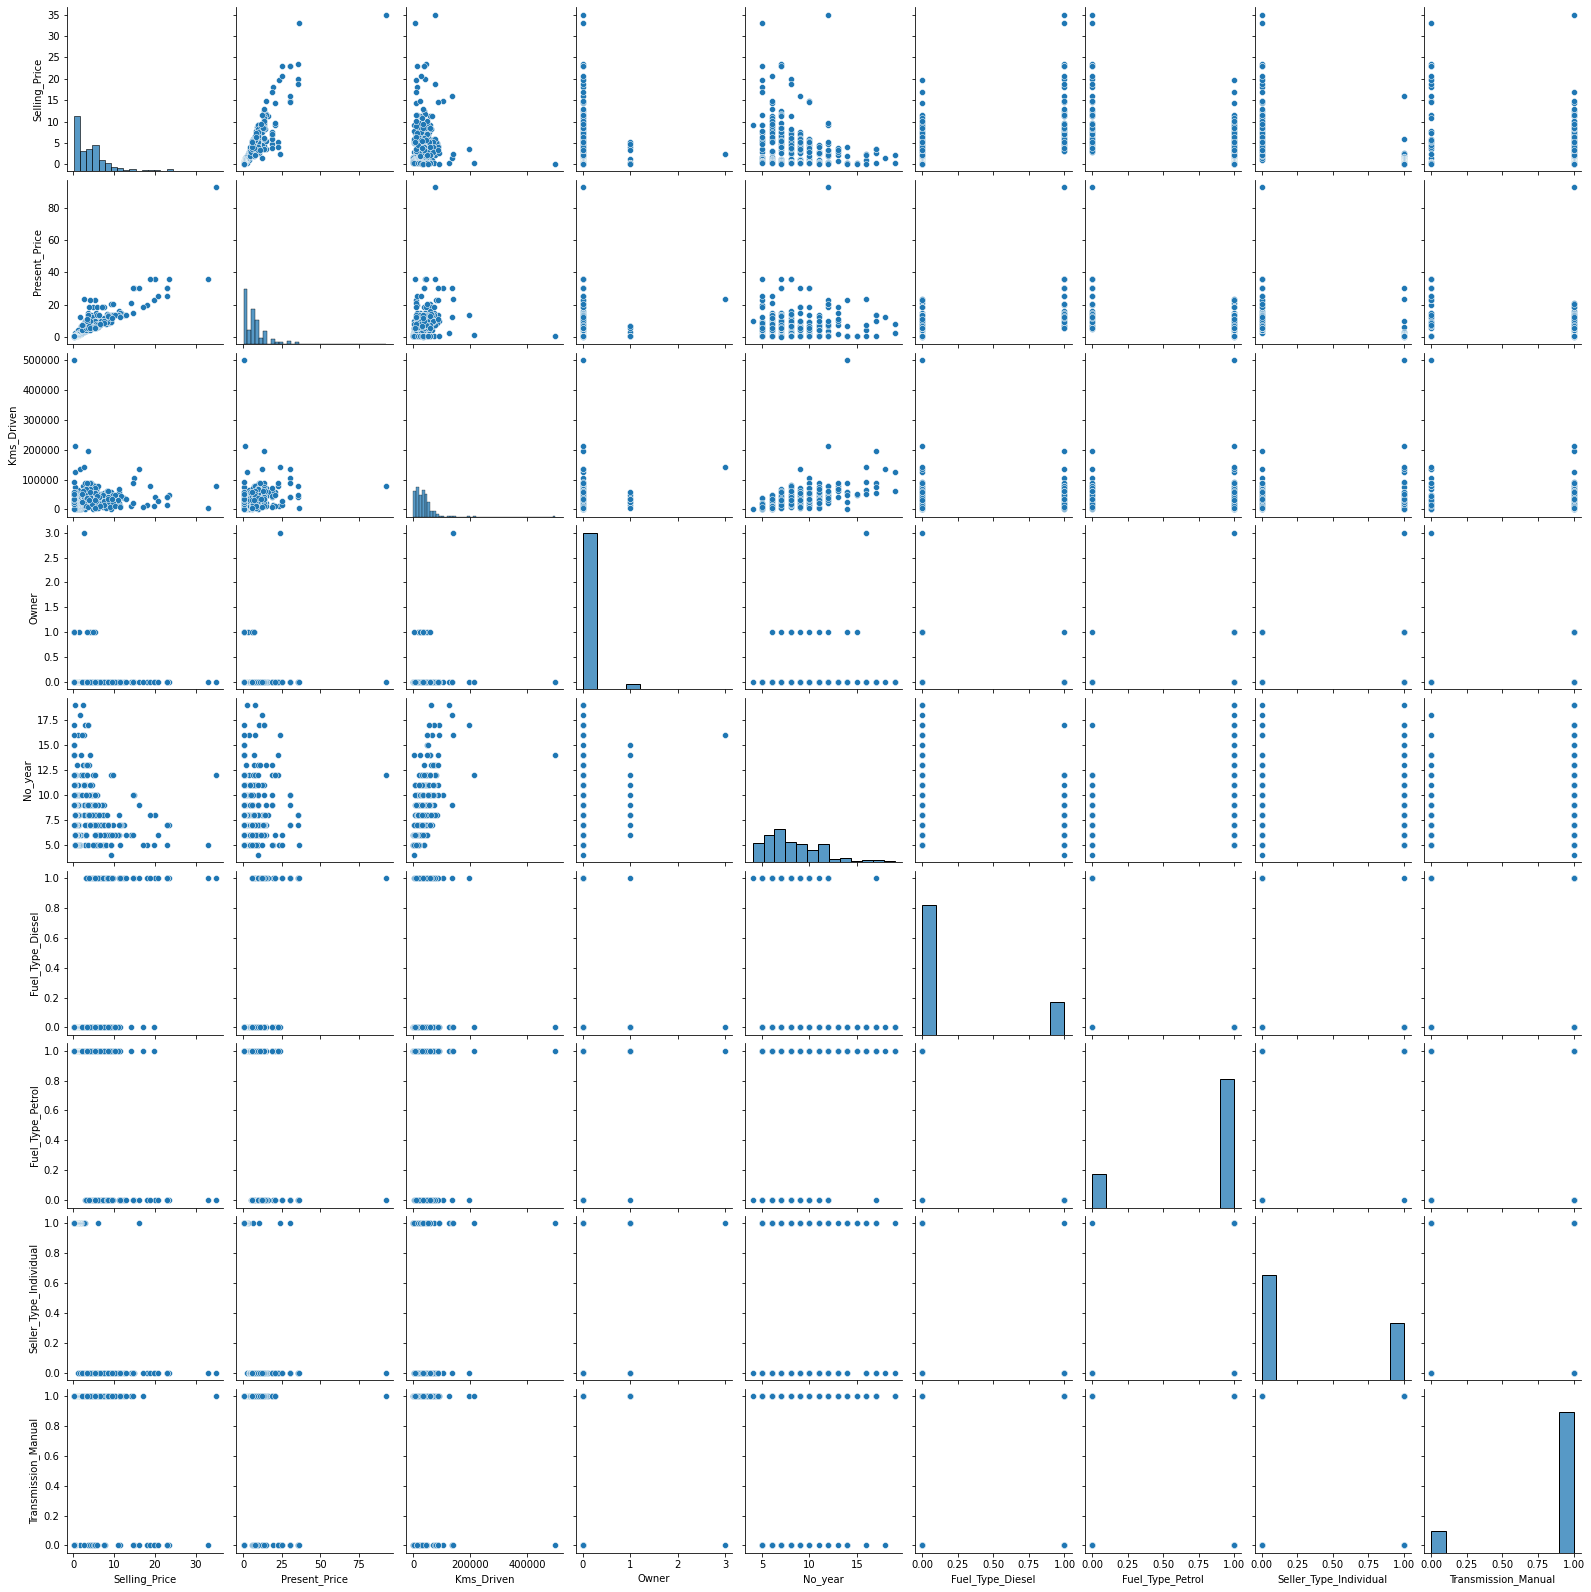

In [144]:
sns.pairplot(final_df)

In [145]:
import matplotlib.pyplot as plt
%matplotlib inline

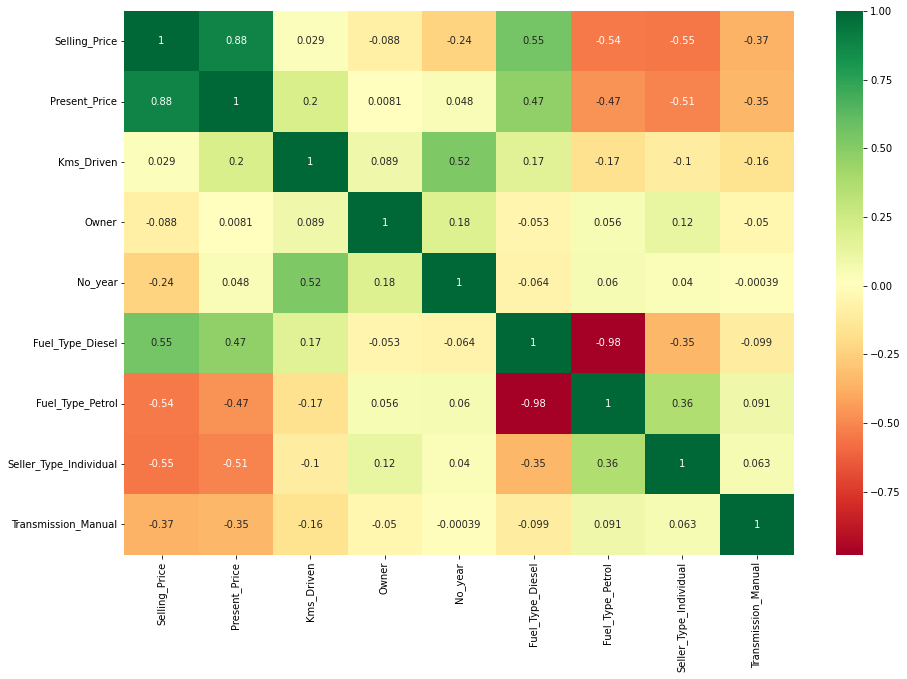

In [146]:
corrmat=final_df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(15,10))
g=sns.heatmap(final_df[top_corr_features].corr(), annot=True,cmap="RdYlGn")

In [147]:
X= final_df.iloc[: ,1:]
y = final_df.iloc[: ,0]

In [148]:
X.head()

,Present_Price,Kms_Driven,Owner,No_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,8,0,1,0,1
1,9.54,43000,0,9,1,0,0,1
2,9.85,6900,0,5,0,1,0,1
3,4.15,5200,0,11,0,1,0,1
4,6.87,42450,0,8,1,0,0,1


In [149]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [150]:
# Feature Importance

from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [151]:
print(model.feature_importances_)

[0.39998737 0.04185725 0.00095718 0.07782899 0.21344542 0.01874489
 0.1210107  0.1261682 ]


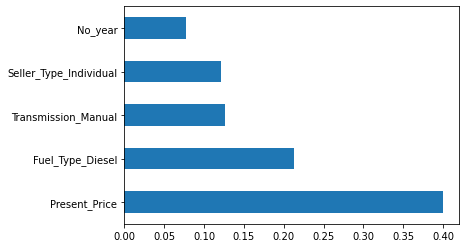

In [152]:
#Plot graph of feature importance for better visualization
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.nlargest(5).plot(kind="barh") # top 5 imp features
plt.show()

In [153]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [154]:
X_train.shape

(240, 8)

In [155]:
X_test.shape

(61, 8)

In [156]:
y_test.shape

(61,)

In [157]:
y_train.shape

(240,)

In [158]:

from sklearn.ensemble import RandomForestRegressor
rf_random= RandomForestRegressor

In [159]:
###Hyperparmeters
n_estimators =[int(x) for x in np.linspace(start =100 ,stop =1200 , num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [160]:
# Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start =100, stop =1200 , num =12)]

# Number of features to consider at every split
max_features = ["auto" ,"sqrt"]

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5 , 30 , num =61)]

#max_depth.append(None)

# Minimum number of sampls required to split a node
min_samples_split = [2,5,10, 15,100]

# Minimum number of samples required at each stage leaf node
min_samples_leaf = [1,2,5,10]



In [161]:
from sklearn.model_selection import RandomizedSearchCV

In [162]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
              'max_features' :max_features,
              'max_depth': max_depth,
              'min_samples_split' : min_samples_split,
            'min_samples_leaf' : min_samples_leaf}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 5, 5, 6, 6, 7, 7, 7, 8, 8, 9, 9, 10, 10, 10, 11, 11, 12, 12, 12, 13, 13, 14, 14, 15, 15, 15, 16, 16, 17, 17, 17, 18, 18, 19, 19, 20, 20, 20, 21, 21, 22, 22, 22, 23, 23, 24, 24, 25, 25, 25, 26, 26, 27, 27, 27, 28, 28, 29, 29, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [163]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()

In [164]:
rf_random =RandomizedSearchCV(estimator = rf , param_distributions = random_grid, scoring ="neg_mean_squared_error", n_iter = 10 , cv =5 , verbose =2 , random_state=42, n_jobs = 1)

In [165]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=300; total time=   0.6s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=300; total time=   0.6s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=300; total time=   0.6s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=300; total time=   0.7s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=300; total time=   0.6s
[CV] END max_depth=18, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=400; total time=   0.8s
[CV] END max_depth=18, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=400; total time=   0.8s
[CV] END max_depth=18, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 5, 5, 6, 6, 7, 7, 7, 8,
                                                      8, 9, 9, 10, 10, 10, 11,
                                                      11, 12, 12, 12, 13, 13,
                                                      14, 14, 15, 15, 15, 16,
                                                      16, 17, ...],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                         

In [166]:
rf_random.best_score_

-3.9835524912945792

In [167]:
from sklearn import metrics
predictions=rf_random.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.8259850872788809
MSE: 2.199464824734482
RMSE: 1.483059278901043


In [168]:
predictions = rf_random.predict(X_test)

In [169]:
predictions

array([ 9.04406667,  3.39592257,  6.80741952,  0.34364987,  3.1423475 ,
        5.01652   ,  3.58540812,  0.5767705 , 12.38092   ,  0.40898933,
        7.73274333,  5.52551202,  4.8419    ,  7.42412   , 12.71116   ,
        9.785125  ,  6.7972    ,  8.11254   ,  5.09902   ,  9.3877    ,
        0.44839067,  0.21695333,  0.65438   , 10.14704   ,  5.4812    ,
        1.35536   ,  4.38760976,  0.86862556,  8.20889333,  3.64866   ,
        2.17812   ,  0.4568738 ,  4.89518   ,  3.34412515,  4.24805   ,
        0.29388   ,  5.14906369,  5.63448   ,  5.353905  ,  6.42832   ,
        0.41203   ,  3.76689   ,  7.1516    ,  1.13018556,  7.04114   ,
        0.77659   ,  8.23496   ,  2.839875  , 11.4173    ,  4.61813571,
        8.96056   ,  6.045375  ,  4.88413994,  0.39051686,  2.76024417,
        3.03765222,  8.95584   ,  4.54912222,  5.29096   ,  3.80613655,
        2.49794   ])

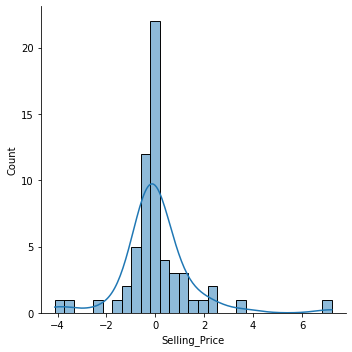

In [170]:
sns.displot(y_test-predictions , kde= True)

Text(0, 0.5, 'Prediction--->')

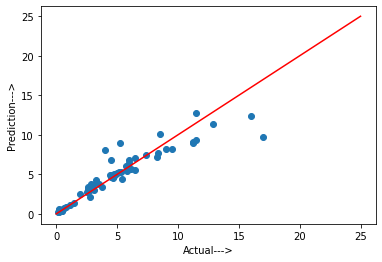

In [171]:
plt.scatter(y_test,predictions)
X=[0,25]
y=[0,25]
plt.plot(X,y,color="r")
plt.xlabel("Actual--->")
plt.ylabel("Prediction--->")

In [172]:
import pickle
#open a file , where you want to store the data

file = open("random_forest_regression_model.pkl","wb")

# dump information to that file
pickle.dump(rf_random, file)